Before we get into Poisson distributions and the processes they describe, we need to first introduce Gaussian distributions. The reason is that Poisson distributions are just a special type of Gaussian distribution. This is the equation for a Gaussian distribution:

$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

$\mu$ is the mean of the distribution

$\sigma$ is the standard deviation of the distribution

It's alright if equations aren't your thing. The thing to remember is that you have some distribution of your data and that there is a mean/average ($\mu$) and another parameter describing how spread out the distribution is---the standard deviation ($\sigma$). The following code allows us to play with those two parameters and see how it affects the Gaussian distribution. Go ahead and change 'mu' and 'sigma' and then push the "play" button to see how the distribution changes.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'Gaussian distribution')]

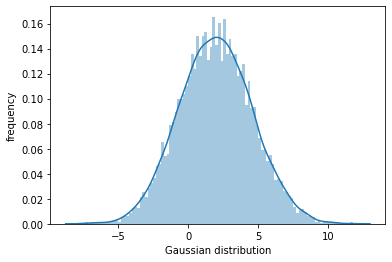

In [21]:
# Create inline plots
%matplotlib inline

# Matplotlib
import matplotlib.pyplot as plt

# Numpy module
import numpy as np

# Math module
import math

# Seaborn for visualizing distributions
import seaborn as sns

# A Poisson distribution is a special type of Gaussian distribution in which the
# mean and variance are equal. Many physical and biological phenomena are well-
# described by Poisson distributions.

# First, let's try to unpack the Poisson distribution a bit by making a generic
# Gaussian distribution with a mean (mu) and standard deviation (sigma). Choose
# whatever numbers you like.
mu = 2.0
sigma = 2.6

y = sigma * np.random.randn(1,10000) + mu

ax = sns.distplot(y, bins = 100);
ax.set(xlabel='Gaussian distribution', ylabel='frequency')



Go ahead and play around with the parameters for the Gaussian distribution. What you'll notice as you change the parameters, is that the values along the x-axis change, but the general, bell-curve, shape stays the same.

A Poisson distribution is just a special case in which the mean and variance are equal. The standard deviation ($\sigma$) is the square root of the variance and, since the mean and variance are equal, it is also the square root of the mean ($\mu$).

$\sigma = \sqrt{\mu}$

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'Poisson distribution')]

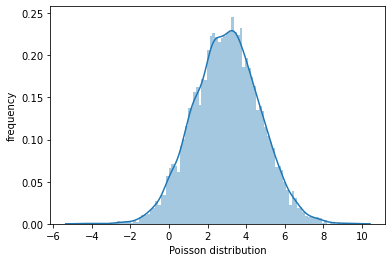

In [22]:
# Define a mean/variance.
mu = 3.0
# The standard deviation (sigma) is just the square root of this value.
sigma = math.sqrt(mu)

# 'randn' just generates a bunch of random numbers that have a Gaussian distribution
y = sigma * np.random.randn(1,10000) + mu


# Let's plot the histogram of the numbers we generated and then plot the 
# function as well.
ax = sns.distplot(y, bins = 100);
ax.set(xlabel='Poisson distribution', ylabel='frequency')


All that's happened is that we've constrained the Gaussian distribution to have only one free parameter instead of two. Wasn't that easy?!

So, why did I make you learn this then? Well, it turns out that there are many physical processes that are well described with Poisson statistics. Here are a few examples that are relevant to you and me: 

1) In physics, the frequency of photon arrivals. This will become important very soon.

2) Neural spike counts (not exactly due to the refractory period)...

3) Frequency of vesicle release at synapses

Let's look at concrete example. Photon arrivals at a detector obey Poisson statistics so let's simulate a distribution of photon counts based on a mean values. Now, if we're talking about photon counts in, say, a 100 ms window, we aren't going to observe any counts that are less than zero, so we can clip the negative values out.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'number of bins'), Text(0.5, 0, 'photon count per bin')]

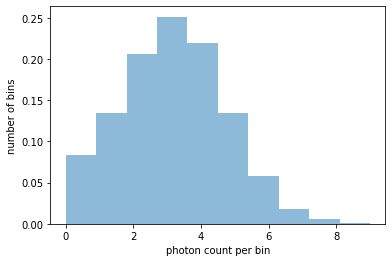

In [24]:
mu = 3.0
sigma = math.sqrt(mu)

y = sigma * np.random.randn(1,10000) + mu

# Photon counts are discrete (integers), so let's round.
y = np.round(y)

# We can't have negative photon counts, so set them to zero.
y[y < 0] = 0

ax = sns.distplot(y, bins = int(np.amax(y)+1.0), kde=False, norm_hist=True, hist_kws={"linewidth": 15, 'alpha':0.5});
ax.set(xlabel='photon count per bin', ylabel='number of bins')

That's all there is to it. We can see the probability (y-axis) that we observed x number of photons (x-axis). This type of visualization can be very helpful as we try to understand neural systems, etc. There are many examples of this, but for the time being I would like you to become comfortable with this concept. So, please play around with the code to familiarize yourself with how things change as we shift the parameters around.

Gaussian functions will keep coming up, not just in understanding 
neuroscience concepts, but also in your data analysis. For example, many
of the tools that simplify statistical calculations (such as t-tests) 
assume that your data conforms to a Gaussian distribution. If you're not
certain that this is the case, then you need to use other methods. 



**Cumulative distribution functions (CDFs)**

So far in this tutorial, we have explored Gaussian/Poisson probability
density functions (PDF). Now, we want to turn our attention to the 
cumulative distribution functions (CDF) for these distributions.

So what is a cumulative distribution function?

To answer that question, let's back up and give an example of a Gaussian
distribution. The classic example, of course, is the distribution of
IQ's. The mean IQ is, by definition, 100 and the standard deviation is 15. Let's make a little IQ PDF/distribution.

Text(0, 0.5, 'probability')

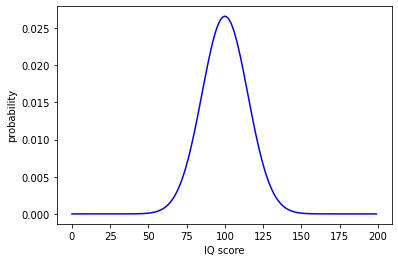

In [25]:
mu = 100
sigma = 15

# Use a lambda expression to define a Gaussian function.
gaussfun = lambda mu,sigma,x : 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x - mu)**2/(2*sigma**2))

x = np.arange(200)
# Pass the parameters to our anonymous function.
y = gaussfun(mu,sigma,x);
y = y/sum(y); # Area under the curve must equal 1.

plt.plot(x, y, c='blue')
plt.xlabel('IQ score')
plt.ylabel('probability')


Alright, let's now look at the probability of a person having an IQ of exactly 120.

In [ ]:
# Find the probability of having an IQ of exactly 120.
p120 = y[x == 120]
print(p120)

[0.010934]


For our example, that turns out to be about 1%... It turns out that the 120 threshold is pretty important... In Malcolm Gladwell's book 'Outliers' he cites studies indicating that up to 120, IQ is a reliable predictor of a person's success, but above that threshold, it no longer correlates with success. The argument is that the IQ test captures something about intelligence, but there are aspects of intellect that it does not assess adequately. I digress, but it's a fun read. 

OK, so what if we wanted to know what percentage of the population have an IQ less than 120? How would we calculate that? Well, knowing the value at 120, isn't particularly informative... This is where the cumulative distribution function becomes useful.

To find the probability of someone having an IQ less than 120, we need to take the definite integral from [0,119]. This calculates the area under the distribution (i.e., cumulative distribution function) from  0 to 119.

In [26]:
# Get the cumulative probability: the probability of someone having an IQ less than 120.
cumPr120 = np.sum(y[x < 120])
print(cumPr120)

0.9032407778362548


That gives us a value of 0.90, meaning that 90% of the population has an IQ less than 120. We could do the same thing and get the probability that a random person on the street has an IQ less than or equal to any value. One way to calculate this would be in a 'for' loop:

Text(0, 0.5, 'cumulative probability')

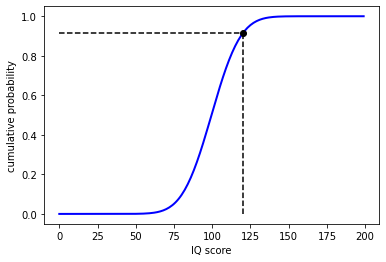

In [27]:
cumPr = np.zeros(x.shape) # Good practice to pre-allocate memory...
for k in range(len(x)):
  cumPr[k] = np.sum(y[x <= x[k]])

# Let's take a look at the results.
plt.plot(x, cumPr, 'b', linewidth=2)

# Let's highlight teh value at 120 for fun.
plt.plot(120, cumPr[x == 120], 'ko')
plt.plot(120*np.ones([2]),[0,cumPr[x==120]],'k--')
plt.plot([0,120],cumPr[x==120]*np.ones([2]),'k--')

plt.xlabel('IQ score')
plt.ylabel('cumulative probability')

I've highlighted the value at 120 to illustrate what we discussed above. This is the cumulative distribution function (CDF) for the Gaussian distribution that we looked at earlier. That's all there is to it!!

It turns out that there are several ways to calculate the CDF. The for loop example above is one way, and I would like to show you two other ways of doing the calculation. Both ways are easier than the for loop example:

1) 'cumsum': Numpy has a built-in function called 'cumsum' that does exactly what we did in the for loop, but using this function just means fewer lines of code that we have to write. Let's do it!

Text(0, 0.5, 'cumulative probability')

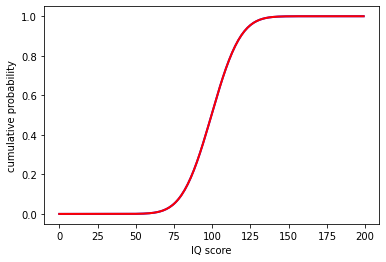

In [28]:
cumPrCumSum = np.cumsum(y)

# Let's plot the output from our for loop above and the new way to make 
# sure they align.
plt.plot(x, cumPr, 'b', linewidth=2)
plt.plot(x, cumPrCumSum, 'r', linewidth=2)

plt.xlabel('IQ score')
plt.ylabel('cumulative probability')

Yep. We only see one curve, because the two curves are identical. Here's the second way.

2) 'normcdf': This function generates a Gaussian (also called 'Normal') cumulative distribution function based on mean and standard deviation. Check it out.

Text(0, 0.5, 'cumulative probability')

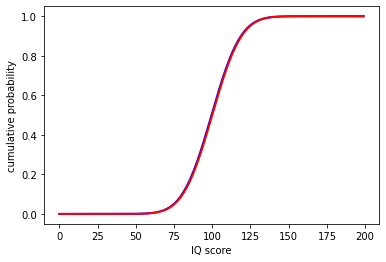

In [29]:
from scipy.stats import norm

cumPrFun = norm.cdf(x, mu, sigma)

# Let's check this as well.
plt.plot(x, cumPr, 'b', linewidth=2)
plt.plot(x, cumPrFun, 'r', linewidth=2)

plt.xlabel('IQ score')
plt.ylabel('cumulative probability')


No big deal, right?! You're just taking the integral under the distribution.


**Fitting a cumulative distribution function**

One thing you'll be doing a lot of in your research is trying to model your data. Imagine that you have some data that you want to present. The first thing to do is show the data. Let's make some pretend data of some IQ scores:

The fitted parameters were mu: 99.1, sigma: 15.5


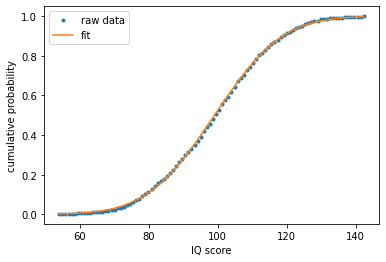

In [55]:
from scipy import stats
from scipy.optimize import curve_fit

# Generate some random Gaussian samples.
dataHist = sigma * np.random.randn(1000) + mu

# Calculate the cumulative frequency of the random samples.
res = stats.cumfreq(dataHist, numbins=100)
# data, binEdges = np.histogram(dataHist, bins=100);

# Get the bin centers.
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
                                 res.cumcount.size)

# Get the cumulative probability.
data = res.cumcount / np.max(res.cumcount)


# Alright, we've created a cumulative distribution of IQ scores. Now, let's
# fit the data.

# You could use this function or the lambda expression below...
# def fitfun(x, mu, sigma):
#   return norm.cdf(x, mu, sigma)

# Another anonymous function.
fitfun = lambda x, mu, sigma : norm.cdf(x, mu, sigma)

# Fit the data.
popt, pcov = curve_fit(fitfun, x, data, p0=(mu,sigma))
print("The fitted parameters were mu: %1.1f, sigma: %1.1f" % tuple(popt))

plt.plot(x,data, '.', label='raw data')
plt.plot(x, fitfun(x, popt[0], popt[1]), label='fit')

plt.xlabel('IQ score')
plt.ylabel('cumulative probability')
plt.legend()

There! We fit the data. That's all there is to it.